# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats
from collections import defaultdict
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import random
def random_pick(some_list, probabilities):
    x = random.uniform(0, 1)
    cumulative_probability = 0.0
    for item, item_probability in zip(some_list, probabilities):
        cumulative_probability += item_probability
        if x < cumulative_probability: break
    return item

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape: ', Y.shape)
scaler = StandardScaler()
# = scaler.fit_transform(X)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

('data shape: ', (70000, 784))
('label shape: ', (70000,))


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

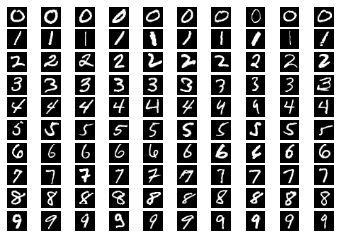

In [3]:
def P1(num_examples=10):
    digits = [col for i in range(10) for col in [index for index, label in enumerate(mini_train_labels) if label==i][0:num_examples]]   
    fig, ax = plt.subplots(10, num_examples)
    plt.style.use("grayscale")
    plt.setp(ax, xticks=[], yticks=[])
    for index, digit in enumerate(ax.flat):
        digit.imshow(np.reshape(mini_train_data[digits[index]], (28,28)))

P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [4]:
def P2(k_values):
    for k in k_values:
        print("\nk="+str(k))
        neigh = KNeighborsClassifier(n_neighbors=k)
        neigh.fit(mini_train_data,mini_train_labels)
        pred=neigh.predict(dev_data)
        matches=pred==dev_labels
        accuracy=float(len([match for match in matches if match==True]))/float(len(matches))
        print(accuracy)
        if k==1:
            print(classification_report(dev_labels,pred))


k_values = [1, 3, 5, 7, 9]
P2(k_values)


k=1
0.888
             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.89      1.00      0.94       105
        2.0       0.99      0.79      0.88       102
        3.0       0.77      0.87      0.82        86
        4.0       0.89      0.82      0.85       104
        5.0       0.93      0.84      0.88        91
        6.0       0.94      0.96      0.95        98
        7.0       0.89      0.92      0.90       113
        8.0       0.94      0.88      0.91        96
        9.0       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000


k=3
0.878

k=5
0.869

k=7
0.865

k=9
0.863


ANSWER: For k=1, 9 is the most difficult digit based on f1-score.

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.


- time.time() gives a wall clock value you can use for timing operations

In [5]:
def P3(train_sizes, accuracies):
    for i in train_sizes:
        start = time.time()
        neigh = KNeighborsClassifier(n_neighbors=1)
        neigh.fit(train_data[:i],train_labels[:i])
        pred=neigh.predict(dev_data)
        matches=pred==dev_labels
        accuracy=float(len([match for match in matches if match==True]))/float(len(matches))
        print("Training Size: " + str(i) + " | Accuracy: " + str(accuracy))
        end = time.time()
        print("Time Elapsed: " + str(end - start) + "\n")
        accuracies.append(accuracy)
        

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
   
P3(train_sizes, accuracies)
print(accuracies)

Training Size: 100 | Accuracy: 0.72
Time Elapsed: 0.113255023956

Training Size: 200 | Accuracy: 0.786
Time Elapsed: 0.22634100914

Training Size: 400 | Accuracy: 0.841
Time Elapsed: 0.454503059387

Training Size: 800 | Accuracy: 0.884
Time Elapsed: 0.926800966263

Training Size: 1600 | Accuracy: 0.902
Time Elapsed: 1.91240286827

Training Size: 3200 | Accuracy: 0.926
Time Elapsed: 3.69655394554

Training Size: 6400 | Accuracy: 0.937
Time Elapsed: 7.41505503654

Training Size: 12800 | Accuracy: 0.959
Time Elapsed: 15.2133159637

Training Size: 25000 | Accuracy: 0.97
Time Elapsed: 32.5939328671

[0.72, 0.786, 0.841, 0.884, 0.902, 0.926, 0.937, 0.959, 0.97]


In [6]:
train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = [0.72, 0.786, 0.841, 0.884, 0.902, 0.926, 0.937, 0.959, 0.97]
n=60000

def P4(train_sizes, accuracies, n):
    #I chose to hardcode this because it takes forever to run
    #accuracies = []
    #P3(train_sizes,accuracies)
    
    accLogit = [math.log(val/(1-val)) for val in accuracies]
    regr=LinearRegression()
    
    regr.fit(np.reshape(train_sizes,(-1,1)), accuracies)
    std=regr.predict(np.reshape(n,(-1,1)))
    
    regr.fit(np.reshape(train_sizes,(-1,1)), accLogit)
    log=regr.predict(np.reshape(n,(1,-1)))
    
    print("\nStandard form: " + str(std[0]))
    print("Logit transform: " + str(math.exp(log)/(1+math.exp(log))))
 
    return(math.exp(log)/(1+math.exp(log)))

P4(train_sizes, accuracies, 60000)


Standard form: 1.24307226036
Logit transform: 0.998817960328


0.9988179603283155

ANSWER: Using just the train sizes from P3, my linear model gives an accuracy of 1.2524, which clearly doesn't make sense because there should be a ceiling of 1 for this model.  The regression is linear so it doesn't account for the bounded nature of the y variable, but we can improve upon this by applying a logit transform to our training sizes. In doing so, i get an accuracy of .9988 for n=60000, and for larger values this bounds to 1.

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

[[ 99   0   0   0   0   0   0   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  1   0  98   2   0   0   0   1   0   0]
 [  0   0   0  83   0   1   0   0   1   1]
 [  0   0   0   0 102   0   0   0   0   2]
 [  1   0   0   0   0  88   0   0   1   1]
 [  1   0   0   0   1   0  96   0   0   0]
 [  0   0   1   0   0   0   0 111   0   1]
 [  1   0   1   2   0   2   1   0  89   0]
 [  0   0   0   0   0   0   0   0   0 106]]

Mistakes: [(6.0, 4.0), (7.0, 2.0), (8.0, 3.0)]


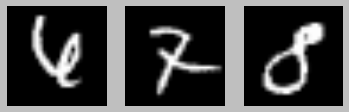

In [7]:
def P5():
    neigh = KNeighborsClassifier(n_neighbors=1)
    neigh.fit(train_data,train_labels)
    pred=neigh.predict(dev_data)
    print(confusion_matrix(dev_labels,pred))   

    matches = pred==dev_labels
    someMistakes = [index for index, x in enumerate(matches) if x==False][0:3]
    
    print("\nMistakes: " + str([(dev_labels[someMistakes[0]], pred[someMistakes[0]]),
                                (dev_labels[someMistakes[1]], pred[someMistakes[1]]),
                                (dev_labels[someMistakes[2]], pred[someMistakes[2]])]))
    fig, ax = plt.subplots(1, 3)
    plt.style.use("grayscale")
    plt.setp(ax, xticks=[], yticks=[])
    for index, digit in enumerate(ax.flat):
        digit.imshow(np.reshape(dev_data[someMistakes[index]], (28,28)))  
    
    
 
P5()

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:

    preprocess the training data but not the dev data
    preprocess the dev data but not the training data
    preprocess both training and dev data
    
Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [8]:
def P6(data_to_transform):
    rs=[np.reshape(data, (28,28)) for data in data_to_transform]
    new = []

    for digit in range(len(rs)):
        blur = [[0 for x in range(28)] for y in range(28)] 
        for col in range(28):
            for row in range(28):
                if col==0 and row==0:
                    blur[row][col]=(rs[digit][row][col]+rs[digit][row+1][col+1]
                                    +rs[digit][row+1][col]+rs[digit][row][col+1])/4
                elif col==0 and row==27:
                    blur[row][col]=(rs[digit][row][col]+rs[digit][row-1][col+1]
                                    +rs[digit][row-1][col]+rs[digit][row][col+1])/4
                elif col==27 and row==0:
                    blur[row][col]=(rs[digit][row][col]+rs[digit][row+1][col-1]
                                    +rs[digit][row+1][col]+rs[digit][row][col-1])/4
                elif col==27 and row==27:
                    blur[row][col]=(rs[digit][row][col]+rs[digit][row-1][col-1]
                                    +rs[digit][row-1][col]+rs[digit][row][col-1])/4
                elif col==0:
                    blur[row][col]=(rs[digit][row][col]+rs[digit][row+1][col+1]
                                    +rs[digit][row-1][col+1]+rs[digit][row+1][col]
                                    +rs[digit][row-1][col]+rs[digit][row][col+1])/6
                elif row==0:
                    blur[row][col]=(rs[digit][row][col]+rs[digit][row+1][col+1]
                                    +rs[digit][row+1][col-1]+rs[digit][row+1][col]
                                    +rs[digit][row][col+1]+rs[digit][row][col-1])/6
                elif col==27:
                    blur[row][col]=(rs[digit][row][col]+rs[digit][row-1][col-1]
                                    +rs[digit][row+1][col-1]+rs[digit][row+1][col]
                                    +rs[digit][row-1][col]+rs[digit][row][col-1])/6
                elif row==27:
                    blur[row][col]=(rs[digit][row][col]+rs[digit][row-1][col-1]
                                    +rs[digit][row-1][col+1]+rs[digit][row-1][col]
                                    +rs[digit][row][col+1]+rs[digit][row][col-1])/6
                else:
                    blur[row][col]=(rs[digit][row][col]+rs[digit][row+1][col+1]+rs[digit][row-1][col-1]
                                    +rs[digit][row+1][col-1]+rs[digit][row-1][col+1]+rs[digit][row+1][col]
                                    +rs[digit][row-1][col]+rs[digit][row][col+1]+rs[digit][row][col-1])/9
        new.append(blur)
    return(new)

def TestKnn(k, train, train_label, dev, dev_label):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(train,train_label)
    pred=neigh.predict(dev)
    matches=pred==dev_label
    accuracy=float(len([match for match in matches if match==True]))/float(len(matches))
    print(accuracy)
    


new_dev = P6(dev_data)
new_dev = np.reshape(new_dev,(len(dev_labels),-1))
new_train = P6(mini_train_data)
new_train = np.reshape(new_train,(len(mini_train_labels),-1))

TestKnn(2, mini_train_data,mini_train_labels,dev_data, dev_labels)
TestKnn(2, new_train,mini_train_labels, dev_data, dev_labels)
TestKnn(2, mini_train_data,mini_train_labels, new_dev, dev_labels)
TestKnn(2, new_train,mini_train_labels, new_dev, dev_labels)


0.864
0.892
0.844
0.89


ANSWER: It would appear that applying the blurring to both the dev and train data results in the highest accuracy, though it's only marginally better than the case where we just apply the blur to the train data, so this may reverse on different iterations of this prediction.

In [9]:
def P7():
    bern=BernoulliNB(binarize=.08)
    bern.fit(mini_train_data, mini_train_labels)
    pred=bern.predict(dev_data)
    matches=pred==dev_labels
    accuracy=float(len([match for match in matches if match==True]))/float(len(matches))
    print("Bernoulli Accuracy: " + str(accuracy))

    multi_train_data =[[round(2*pixel) for pixel in digit] for digit in mini_train_data]
    mult=MultinomialNB()
    mult.fit(multi_train_data, mini_train_labels)
    pred=mult.predict(dev_data)
    matches=pred==dev_labels
    accuracy=float(len([match for match in matches if match==True]))/float(len(matches))
    print("Multinomial Accuracy: " + str(accuracy))

P7()

Bernoulli Accuracy: 0.813
Multinomial Accuracy: 0.801


ANSWER: The multinomial version does not improve results.  This may be due to the type of mapping I used, which would map pixel ranges .26-.74 to a value of 1.  In doing this i may be adding more likeness to various digits by increasing the grey values they might share, which would reduce the separability of the data.

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [10]:
alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}

def P8(alphas):
    bern=BernoulliNB(binarize=.08)
    clf = GridSearchCV(bern, alphas)
    dog = clf.fit(mini_train_data, mini_train_labels)
    pred = clf.predict(dev_data)
    print(dog.best_params_)
    matches=pred==dev_labels
    accuracy=np.mean(matches)
    print("Accuracy: " + str(accuracy))
    print("\n")
    return(clf.grid_scores_)

nb = P8(alphas)
print(nb)

/Users/AnthonySpalvieriKruse/anaconda/lib/python2.7/site-packages/sklearn/naive_bayes.py:766: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc)
/Users/AnthonySpalvieriKruse/anaconda/lib/python2.7/site-packages/sklearn/naive_bayes.py:785: RuntimeWarning: divide by zero encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))


{'alpha': 0.01}
Accuracy: 0.817


[mean: 0.09200, std: 0.00080, params: {'alpha': 0.0}, mean: 0.81500, std: 0.01948, params: {'alpha': 0.0001}, mean: 0.82000, std: 0.01693, params: {'alpha': 0.001}, mean: 0.82100, std: 0.01813, params: {'alpha': 0.01}, mean: 0.81500, std: 0.01710, params: {'alpha': 0.1}, mean: 0.81400, std: 0.01581, params: {'alpha': 0.5}, mean: 0.81700, std: 0.01906, params: {'alpha': 1.0}, mean: 0.80900, std: 0.01822, params: {'alpha': 2.0}, mean: 0.77400, std: 0.01868, params: {'alpha': 10.0}]


ANSWER: The best alpha value was 0.01 with an accuracy of .835, though this tends to shift between .0001 and .1 between iterations.  The mean accuracy for alpha 0 was .116, which is extremely low.  This does make sense however, because with no laplace smoothing we will likely encounter various feature values in our test set that were not seen in the training set.  Because of this, the conditional probability of seeing this value given a certain digit label will be zero, so examples that would otherwise be easy to classify will have their likelihoods obfuscated by these values.

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [11]:
def P9():
    groups = {}
    for i in range(len(mini_train_data)-1):
        if mini_train_labels[i] in groups:
            groups[mini_train_labels[i]] = np.concatenate((groups[mini_train_labels[i]],[mini_train_data[i]]), axis=0)
        else:
            groups[mini_train_labels[i]] = [mini_train_data[i]]

    theta = np.array([[sum(i)/len(group) for i in zip(*group)] for key, group in groups.items()])
    sigma = np.array([[max(.1,np.var(i)) for i in zip(*group)] for key, group in groups.items()])
    blah = np.array([[sum(i) for i in zip(*group)] for key, group in groups.items()])


    bern=GaussianNB()
    bern.fit(mini_train_data, mini_train_labels)
    pred=bern.predict(dev_data)
    matches=pred==dev_labels
    accuracy=np.mean(matches)
    print("Gaussian Accuracy: " + str(accuracy))


    bern.sigma_=sigma
    bern.theta_=theta
    pred=bern.predict(dev_data)
    matches=pred==dev_labels
    accuracy=np.mean(matches)
    print("Gaussian Accuracy Params Added: " + str(accuracy))
    
    return(accuracy)


gnb = P9()

Gaussian Accuracy: 0.621
Gaussian Accuracy Params Added: 0.806


ANSWER:

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

Bernoulli Accuracy: 0.813


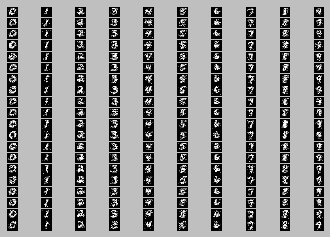

In [12]:
def P10(num_examples):
    ### STUDENT START ###
    bern=BernoulliNB(binarize=.08)
    bern.fit(mini_train_data, mini_train_labels)
    pred=bern.predict(dev_data)
    matches=pred==dev_labels
    accuracy=np.mean(matches)
    print("Bernoulli Accuracy: " + str(accuracy))


    #Make copy of probability vectors
    newSample = np.exp(bern.feature_log_prob_)
    #This is a list of generated data for digits 0-9.  I need 20 of these 
    newSample = [[random_pick([1,0],[prob, 1-prob]) for prob in digit] for i in range(20) for digit in newSample]



    fig, ax = plt.subplots(20, 10)
    plt.style.use("grayscale")
    plt.setp(ax, xticks=[], yticks=[])
    for index, digit in enumerate(ax.flat):
        digit.imshow(np.reshape(newSample[index], (28,28)))

P10(20)

ANSWER: These digits look much "scratchier" than the training digits.  This makes sense of course, because each pixel has a random chance of being zero or 1, so regions that would generally be all 0/black in the training set would have some white pixels scattered throughout.  The inverse is true for the digits themselves, which have black pixels littered throughout densely white regions.  

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

Bernoulli Accuracy: 0.813
p(pred) <= 0.5000000000000    total =   0    accuracy = 0.000
p(pred) <= 0.9000000000000    total =  36    accuracy = 0.389
p(pred) <= 0.9990000000000    total =  75    accuracy = 0.453
p(pred) <= 0.9999900000000    total =  68    accuracy = 0.559
p(pred) <= 0.9999999000000    total =  64    accuracy = 0.516
p(pred) <= 0.9999999990000    total =  56    accuracy = 0.786
p(pred) <= 0.9999999999900    total =  63    accuracy = 0.746
p(pred) <= 0.9999999999999    total =  52    accuracy = 0.827
p(pred) <= 1.0000000000000    total = 586    accuracy = 0.956


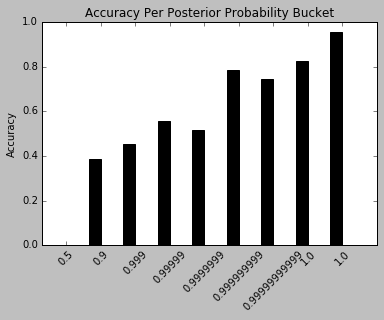

In [26]:
def getBucketIndex(prob, buckets):
    for i in range(len(buckets)):
        if i==0:
            if prob<buckets[i]:
                return i
        elif i==len(buckets)-1:
            if prob>=buckets[i]:
                return i
        else:
            if prob>=buckets[i-1] and prob<buckets[i]:
                return i
    return i

def P11(buckets, correct, total):

    bern=BernoulliNB(binarize=.08)
    bern.fit(mini_train_data, mini_train_labels)
    pred=bern.predict(dev_data)
    matches=pred==dev_labels
    accuracy=np.mean(matches)
    print("Bernoulli Accuracy: " + str(accuracy))

    probSet = bern.predict_proba(dev_data)
    predictions=bern.predict(dev_data)

    for index, probs in enumerate(probSet):
        prob = np.amax(probs)
        bucketIndex = getBucketIndex(prob,buckets)
        total[bucketIndex]+=1
        if predictions[index]==dev_labels[index]:
            correct[bucketIndex]+=1

    ratios=[float(x)/float(y) if x!=0 else 0 for x,y in zip(correct,total)]
    for i in range(len(buckets)):
        accuracy = 0.0
        if (total[i] > 0): accuracy = float(correct[i]) / float(total[i])
        print('p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy))


    fig = plt.figure()
    ax = fig.add_subplot(111)
    N = len(ratios)

    ind = np.arange(N)                
    width = 0.35                      
    rects1 = ax.bar(ind, ratios, width,
                    color='black',
                    error_kw=dict(elinewidth=2,ecolor='red'))
    ax.set_xlim(-width,len(ind)+width)
    ax.set_ylim(0,1)
    ax.set_ylabel('Accuracy')
    ax.set_title('Accuracy Per Posterior Probability Bucket')
    xTickMarks = buckets
    ax.set_xticks(ind+width)
    xtickNames = ax.set_xticklabels(xTickMarks)
    plt.setp(xtickNames, rotation=45, fontsize=10)
    plt.show()

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)
    

ANSWER: I would grade this as a weakly calibrated classifier.  In the table above we see that when the posterior probability is .9 the accuracy is only around .4.  However, there is a positive correlation between posterior probability and accuracy (we approach 100% accuracy as posterior probability goes to 1), so while it's not strongly calibrated, it's not poorly calibrated either.

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [29]:
import copy

#Sourced and modified off of http://inventwithpython.com/blogstatic/floodfill/roomcounter.py
def floodFill(world, x, y, oldChar, newChar):
    # The recursive algorithm. Starting at x and y, changes any adjacent
    # characters that match oldChar to newChar.
    worldWidth = len(world)
    worldHeight = len(world[0])

    if oldChar == None:
        oldChar = world[x][y]

    if world[x][y] != oldChar:
        # Base case. If the current x, y character is not the oldChar,
        # then do nothing.
        return

    # Change the character at world[x][y] to newChar
    world[x][y] = newChar

    # Recursive calls. Make a recursive call as long as we are not on the
    # boundary (which would cause an Index Error.)
    if x > 0: # left
        floodFill(world, x-1, y, oldChar, newChar)

    if y > 0: # up
        floodFill(world, x, y-1, oldChar, newChar)

    if x < worldWidth-1: # right
        floodFill(world, x+1, y, oldChar, newChar)

    if y < worldHeight-1: # down
        floodFill(world, x, y+1, oldChar, newChar)

#Sourced and modified off of http://inventwithpython.com/blogstatic/floodfill/roomcounter.py
def getNumOfRooms(world):
    worldWidth = len(world)
    worldHeight = len(world[0])

    roomCount = -1 # because the outside area counts as room, so let's start
                   # off at -1.
    for x in range(worldWidth):
        for y in range(worldHeight):
            # on each possible x, y empty space in the map, call floodfill.
            if world[x][y] == 0:
                floodFill(world, x, y, 0, 1)
                roomCount += 1
    return roomCount

def GetBernoulliAccuracy(train_data,train_labels,dev_data,dev_labels):
    bern=BernoulliNB(binarize=.08)
    bern.fit(train_data, train_labels)
    pred=bern.predict(dev_data)
    matches=pred==dev_labels
    accuracy=np.mean(matches)
    print("Bernoulli Accuracy: " + str(accuracy))
    
def AddFeature(digit):
    digitCopy = np.reshape(digit,(28,28))
    rowSum = digitCopy.sum(axis=1)
    colSum = digitCopy.sum(axis=0)
    regions = getNumOfRooms(copy.deepcopy(digitCopy))
    digit = np.append(digit,rowSum)
    digit = np.append(digit,colSum)
    digit = np.append(digit,regions)
    return(digit)

def P12():
    miniTrainPlus = np.array([AddFeature(digit) for digit in mini_train_data])
    devPlus = np.array([AddFeature(digit) for digit in dev_data])

    GetBernoulliAccuracy(mini_train_data,mini_train_labels,dev_data,dev_labels)
    GetBernoulliAccuracy(miniTrainPlus,mini_train_labels,devPlus,dev_labels)
    print("Marginally better")

P12()

Bernoulli Accuracy: 0.813
Bernoulli Accuracy: 0.824
Marginally better
